In [46]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#opening and transfering data into an array
ds = xr.open_dataset("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp85_tg_mean_annual.nc")

In [29]:
#opening and transfering data into an array
df = pcdf.load_as_df("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp85_tg_mean_annual.nc")

/exec/mlopez/Code/GitHub/processing_netcdf.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  index = ds.indexes['time'].to_datetimeindex()


In [32]:
df

tg_mean
lat       lon        time                  
66.623306 -89.045212 1950-01-01  260.487122
                     1951-01-01  259.087128
                     1952-01-01  258.688416
                     1953-01-01  257.983765
                     1954-01-01  259.069092
...                                     ...
40.041039 -74.045807 2096-01-01  289.984100
                     2097-01-01  290.481293
                     2098-01-01  290.068420
                     2099-01-01  290.675110
                     2100-01-01  290.421906

[11507106 rows x 1 columns]

In [33]:
dfC = df.copy()
dfC["tg_mean"] = dfC["tg_mean"] -273.15
dfC.head()

tg_mean
lat       lon        time                 
66.623306 -89.045212 1950-01-01 -12.662872
                     1951-01-01 -14.062866
                     1952-01-01 -14.461578
                     1953-01-01 -15.166229
                     1954-01-01 -14.080902

In [43]:
year_groups = {y:0 for y in range(1980,2011)}
year_groups.update({y:1 for y in range(2041,2071)})
year_groups.update({y:2 for y in range(2071,2101)})
dfC2 = dfC.reset_index()
dfp = dfC2.groupby([dfC2.time.dt.year.map(year_groups), "lat","lon"]).mean()
dfp

tg_mean
time lat       lon                  
0.0  40.041039 -89.045212  11.470831
               -88.961884  11.450557
               -88.878548  11.439334
               -88.795219  11.419189
               -88.711891  11.433596
...                              ...
2.0  66.623306 -61.629639  -4.207163
               -61.546310  -4.542178
               -61.462978  -4.353801
               -61.379650  -4.303969
               -61.296322  -3.721214

[228618 rows x 1 columns]

In [44]:
df_h = dfp.query("time==0.0")
df_h.head()

tg_mean
time lat       lon                  
0.0  40.041039 -89.045212  11.470831
               -88.961884  11.450557
               -88.878548  11.439334
               -88.795219  11.419189
               -88.711891  11.433596

In [56]:
df_h = df_h.reset_index()

In [57]:
df_h["lon"]

0       -89.045212
1       -88.961884
2       -88.878548
3       -88.795219
4       -88.711891
           ...    
76201   -61.629639
76202   -61.546310
76203   -61.462978
76204   -61.379650
76205   -61.296322
Name: lon, Length: 76206, dtype: float64

No handles with labels found to put in legend.


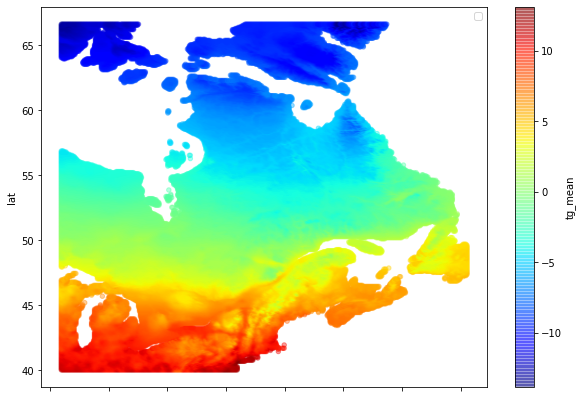

In [58]:
df_h.plot(kind="scatter", x="lon", y="lat",
    c="tg_mean", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

# Clipping by region

In [61]:
%time latlon_df = pcdf.latlon_regions("/home/mlopez/EXEC/Shapefiles/territoire_guide.shp")

/home/mlopez/EXEC/anaconda3/envs/python37-2/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  warn(


CPU times: user 1min 22s, sys: 5.33 s, total: 1min 28s
Wall time: 49.9 s


In [62]:
latlon_df.head()

,lat,lon,geometry,index_right,TER_GUIDE
68896,52.873859,-67.712730,POINT (-67.71273 52.87386),24,6opqr
68897,52.873859,-67.629402,POINT (-67.62940 52.87386),24,6opqr
68898,52.873859,-67.546066,POINT (-67.54607 52.87386),24,6opqr
69312,52.790531,-67.712730,POINT (-67.71273 52.79053),24,6opqr
69313,52.790531,-67.629402,POINT (-67.62940 52.79053),24,6opqr


In [68]:
df_h.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   0.0  11.470831
          -88.961884   0.0  11.450557
          -88.878548   0.0  11.439334
          -88.795219   0.0  11.419189
          -88.711891   0.0  11.433596
...                    ...        ...
66.623306 -61.629639   0.0  -9.604451
          -61.546310   0.0  -9.897219
          -61.462978   0.0  -9.684814
          -61.379650   0.0  -9.605249
          -61.296322   0.0  -9.002694

[76206 rows x 2 columns]

In [70]:
latlon_df.set_index(["lat","lon"])

geometry  index_right TER_GUIDE
lat       lon                                                          
52.873859 -67.712730  POINT (-67.71273 52.87386)           24     6opqr
          -67.629402  POINT (-67.62940 52.87386)           24     6opqr
          -67.546066  POINT (-67.54607 52.87386)           24     6opqr
52.790531 -67.712730  POINT (-67.71273 52.79053)           24     6opqr
          -67.629402  POINT (-67.62940 52.79053)           24     6opqr
...                                          ...          ...       ...
45.041668 -72.291672  POINT (-72.29167 45.04167)            3        2c
          -72.208336  POINT (-72.20834 45.04167)            3        2c
          -72.125000  POINT (-72.12500 45.04167)            3        2c
          -72.041672  POINT (-72.04167 45.04167)            3        2c
          -71.958336  POINT (-71.95834 45.04167)            3        2c

[26789 rows x 3 columns]

In [74]:
dfTG2 = pd.merge(df_h, latlon_df, on=["lat","lon"])

In [75]:
dfTG2

,time,lat,lon,tg_mean,geometry,index_right,TER_GUIDE
0,0.0,45.040840,-74.545792,6.923507,POINT (-74.54579 45.04084),0,1a
1,0.0,45.040840,-74.462463,6.901595,POINT (-74.46246 45.04084),0,1a
2,0.0,45.040840,-74.379128,6.885610,POINT (-74.37913 45.04084),0,1a
3,0.0,45.040840,-74.295799,6.881947,POINT (-74.29580 45.04084),0,1a
4,0.0,45.040840,-74.212471,6.912147,POINT (-74.21247 45.04084),0,1a
...,...,...,...,...,...,...,...
13387,0.0,52.790531,-67.629402,-3.031901,POINT (-67.62940 52.79053),24,6opqr
13388,0.0,52.790531,-67.546066,-2.954689,POINT (-67.54607 52.79053),24,6opqr
13389,0.0,52.873859,-67.712730,-3.185709,POINT (-67.71273 52.87386),24,6opqr
13390,0.0,52.873859,-67.629402,-3.073227,POINT (-67.62940 52.87386),24,6opqr


No handles with labels found to put in legend.


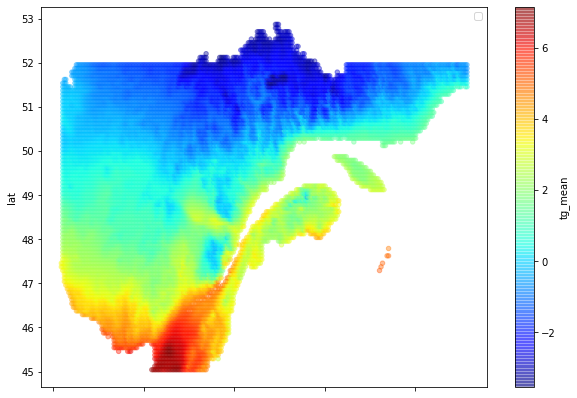

In [76]:
dfTG2.plot(kind="scatter", x="lon", y="lat",
    c="tg_mean", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [110]:
dfTG3 = dfTG2.pivot("lat", "lon", "tg_mean")

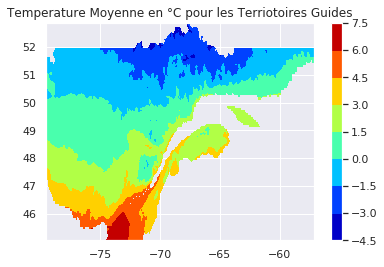

In [116]:
plt.contourf(dfTG3.columns, dfTG3.index, dfTG3.values,
                cmap= "jet")
plt.title("Temperature Moyenne en °C pour les Terriotoires Guides")

plt.colorbar()
plt.savefig("Tgtg.png")

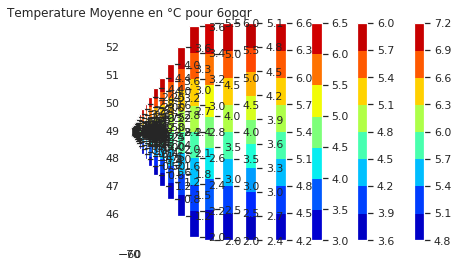

In [118]:
for (TER_GUIDE, df) in dfTG2.groupby("TER_GUIDE"):
    #df.plot(kind="scatter", x="lon", y="lat",
    #    c="tg_mean", cmap=plt.get_cmap("jet"),
    #        title = TER_GUIDE,
    #    colorbar=True, alpha=0.4, figsize=(10,7),
    #)
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Temperature Moyenne en °C pour "+TER_GUIDE)
    plt.colorbar()
    #plt.show()
    plt.savefig(TER_GUIDE+"tg_annual_rcp85.png")

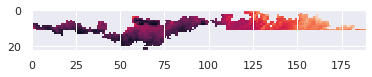

In [99]:
plt.imshow(df.pivot("lat", "lon", "tg_mean").values)

In [84]:
import seaborn as sns; sns.set()

In [86]:
import folium
from folium import plugins


In [92]:
m = folium.Map([48, -70], zoom_start=6)
m

In [94]:
m.add_children(plugins.HeatMap(dfTG2["tg_mean"], radius=15))
m


TypeError: 'float' object is not subscriptable

In [7]:
TSdf = df.groupby("time").mean()
TSdf.head()

,tg_mean
time,
1950-01-01 00:00:00,273.467590
1951-01-01 00:00:00,271.929443
1952-01-01 00:00:00,271.688660
1953-01-01 00:00:00,271.315033
1954-01-01 00:00:00,271.918701


In [43]:
#Adding column of temperature in Celsius
TSMeanC = TSdf
TSMeanC["tg_mean"] = TSMeanC["tg_mean"] -273.15
TSMeanC.head()

,tg_mean
time,
1950-01-01 00:00:00,0.317596
1951-01-01 00:00:00,-1.220551
1952-01-01 00:00:00,-1.461334
1953-01-01 00:00:00,-1.834961
1954-01-01 00:00:00,-1.231293


Text(0.5, 1.0, 'Temperature Moyenne')

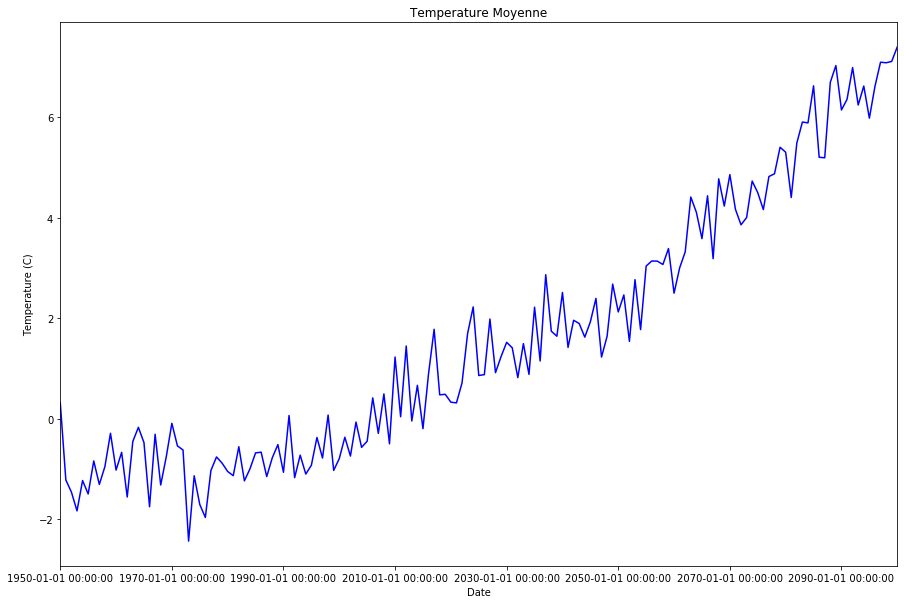

In [46]:
# plot time series
TSMeanC['tg_mean'].plot.line('o-',color='blue',figsize=(15,10))

# add colour reference
#blue_patch = mpatches.Patch(color='blue', label='Temperature Moyenne')
#plt.legend(handles=[blue_patch,])

# add titles
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Moyenne')